# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
titanic.select_dtypes(include=['int64', 'float64'])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [5]:
titanic.select_dtypes(include=['object']).columns


Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

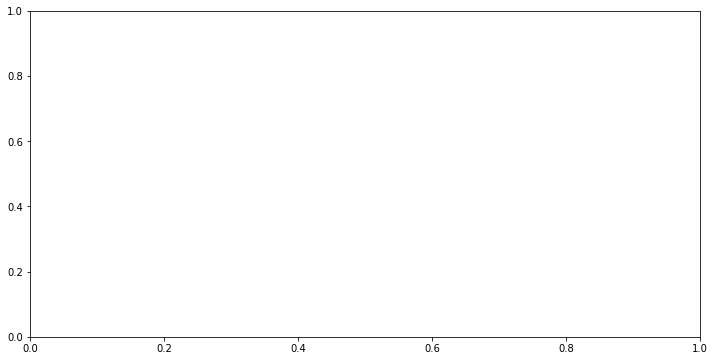

In [6]:
plt.subplots(figsize=(12,6))
plt.style.use('classic')


#### Use the appropriate visulalization to show the distribution of the column `Age`

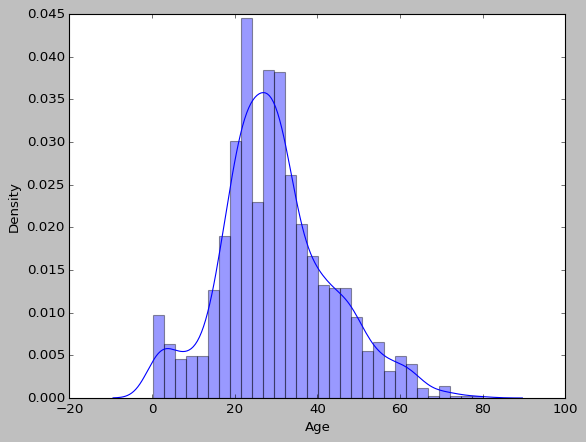

In [7]:
sns.distplot(titanic.Age);

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

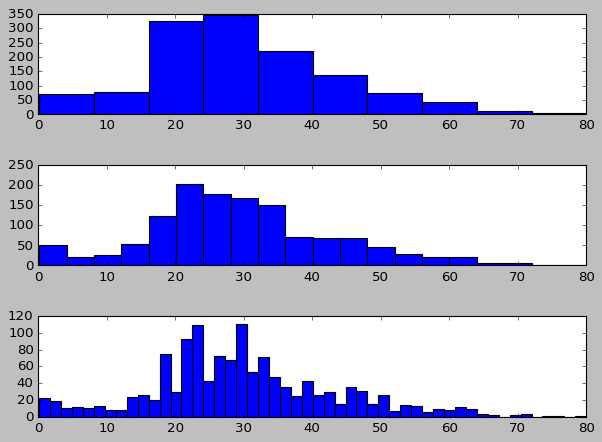

In [8]:
fig, ax = plt.subplots( 3)

ax[0].hist(titanic.Age, bins=10) #row=0, col=1
ax[1].hist(titanic.Age, bins=20) #row=1, col=1
ax[2].hist(titanic.Age, bins=50)
fig.tight_layout(pad=2.0)
fig.show()


#### Whether the bin size affects your plot? Why?

Agrupa los grupos de edad en rangos más pequeños


#### Use seaborn to show the distribution of the column `Age`

<AxesSubplot:xlabel='Age', ylabel='Density'>

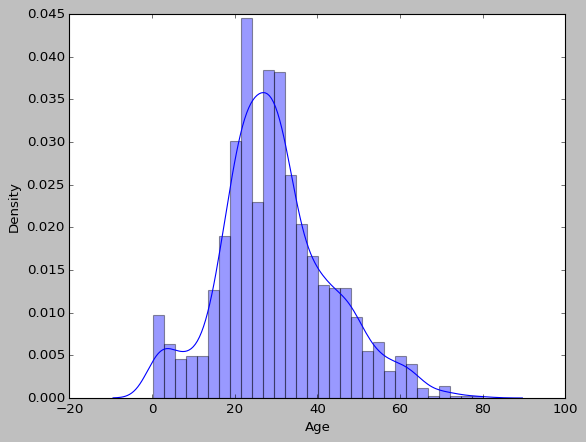

In [9]:
sns.distplot(titanic.Age)


#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

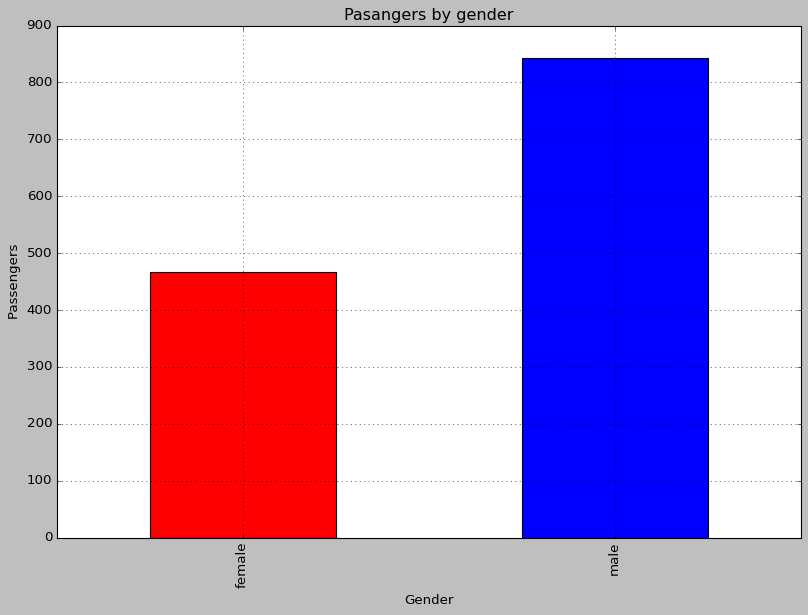

In [10]:
ax=titanic.groupby('Gender').count().PassengerId.plot(
                                                    kind='bar',      
                                                    color=['r', 'b'],
                                                    grid=True,       
                                                    figsize=(12, 8), 
                                                    title='Pasangers by gender'
) 

ax.set_xlabel('Gender')  # etiqueta eje x
ax.set_ylabel('Passenger​s')  # etiqueta eje y

plt.show();

<AxesSubplot:xlabel='Gender', ylabel='count'>

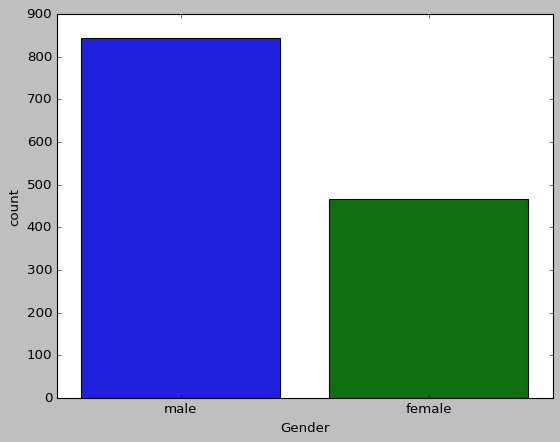

In [11]:
sns.countplot(titanic.Gender)

#### Use the appropriate plot to visualize the column `Pclass` 


<AxesSubplot:xlabel='Pclass', ylabel='count'>

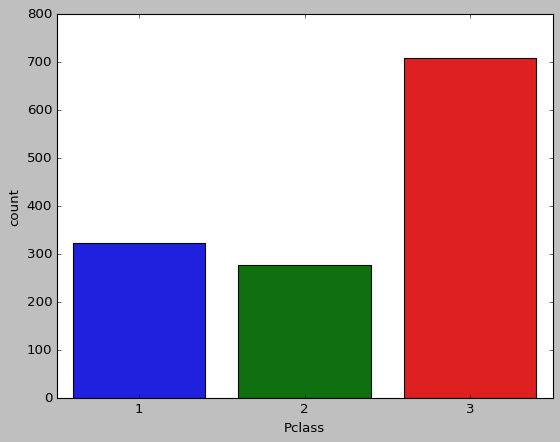

In [12]:
sns.countplot(titanic.Pclass)


#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

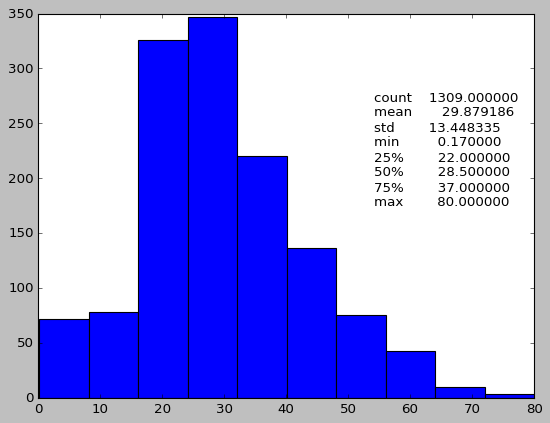

In [13]:

fig, ax = plt.subplots()
ax.hist(titanic['Age'])
plt.figtext(0.65,0.5, titanic.Age.describe().to_string());



#### What does the previous plot tell you about the feature `Age`? Comment.

La edad media es de 30 años, el más peque era un bb el máss viejo (no estabas tú, Sonia) tenía 80 años


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

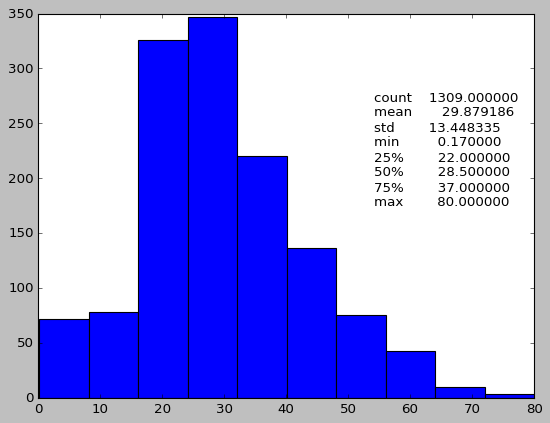

In [14]:
fig, ax = plt.subplots()
ax.hist(titanic['Age'])
plt.figtext(0.65,0.5, titanic.Age.describe().to_string());


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

podemos ver la info por percentiles


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

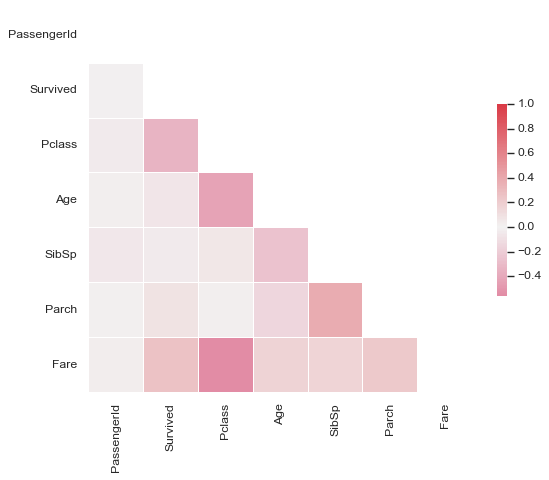

In [22]:
corr=titanic.corr()
sns.set(style='white')   # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))  # genera una mascara para la triangular superior

color_map=sns.diverging_palette(0, 10, as_cmap=True)  # paleta de colores


sns.heatmap(corr,  # mapa de calor
           mask=mascara,
           cmap=color_map,
           vmax=1,  # limite vertical
           center=0, 
           square=True,  # datos como cuadrados
           linewidth=.5, # ancho de linea
           cbar_kws={'shrink': .5}  # barra lateral
           );


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Fare', ylabel='Age'>

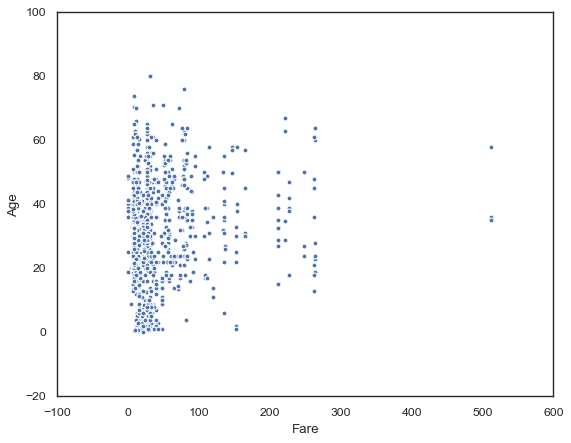

In [23]:
titanic.plot.scatter('Fare', 'Age')


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

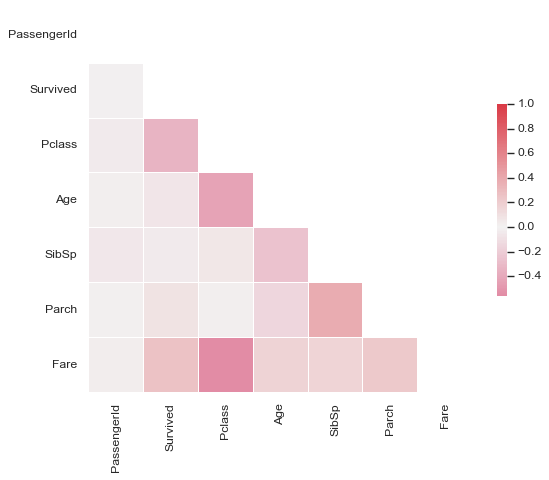

In [24]:
corr=titanic.corr()
sns.set(style='white')   # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))  # genera una mascara para la triangular superior

color_map=sns.diverging_palette(0, 10, as_cmap=True)  # paleta de colores


sns.heatmap(corr,  # mapa de calor
           mask=mascara,
           cmap=color_map,
           vmax=1,  # limite vertical
           center=0, 
           square=True,  # datos como cuadrados
           linewidth=.5, # ancho de linea
           cbar_kws={'shrink': .5}  # barra lateral
           );

#### According to the previous plot, what are the most correlated feature? Comment.

El precio y la clase


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


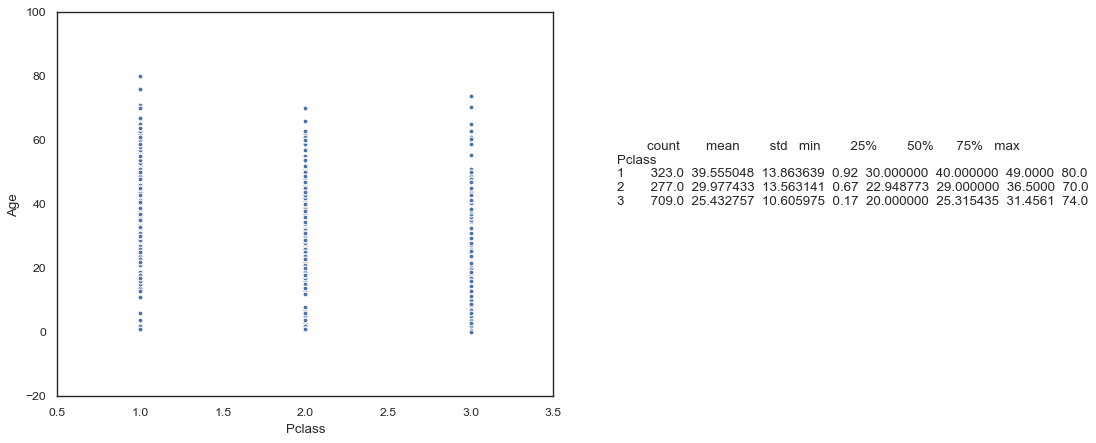

In [25]:
ax = titanic.plot.scatter('Pclass', 'Age')
plt.figtext(1,0.5, titanic.groupby('Pclass').Age.describe().to_string());


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

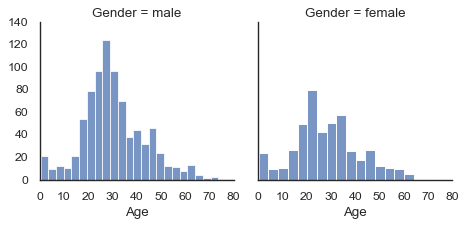

In [26]:
g = sns.FacetGrid(titanic, col='Gender')
g.map(sns.histplot, 'Age');